# Interpreting ResNet Model With Integrated Gradients

This notebook loads the pretrained ResNet model given by [PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/release/2.0) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using Integrated Gradients algorithm, specifically the `IntGradCVInterpreter` class.

In [1]:
import paddle
import interpretdl as it

/opt/conda/envs/paddle2/lib/python3.7/site-packages/paddle/utils/cpp_extension/extension_utils.py:461: UserWarning: Not found CUDA runtime, please use `export CUDA_HOME= XXX` to specific it.
  "Not found CUDA runtime, please use `export CUDA_HOME= XXX` to specific it."
/opt/conda/envs/paddle2/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):


If you have't done so, please first download the pretrained ResNet50 model by runnig the cell below or directly from [this link](https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams). 
More pretrained models can be found in [PaddleClas Model Zoo](https://github.com/PaddlePaddle/PaddleClas/tree/e93711c43512a7ebcec07a0438aa87565df81084#Model_zoo_overview).

In [2]:
# load from paddle.vision
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)

2021-07-08 19:07:42,422 - INFO - unique_endpoints {''}
2021-07-08 19:07:42,423 - INFO - File /root/.cache/paddle/hapi/weights/resnet50.pdparams md5 checking...
2021-07-08 19:07:42,741 - INFO - Found /root/.cache/paddle/hapi/weights/resnet50.pdparams


Initialize the `IntGradCVInterpreter`. 

In [3]:
ig = it.IntGradCVInterpreter(paddle_model, device='gpu:0')

Before interpreting the image, we first take a look at the original image.

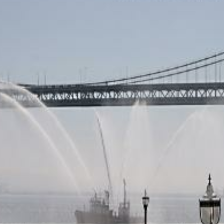

In [4]:
from PIL import Image

from interpretdl.data_processor.readers import read_image

img_path = 'assets/fireboat.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let Integrated Gradients method help us `interpret` the image with respect to the predicted label. We choose to choose random baselines and perform 10 random trials. Gradients are overlayed with the original image.

/opt/conda/envs/paddle2/lib/python3.7/site-packages/paddle/nn/layer/norm.py:648: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")


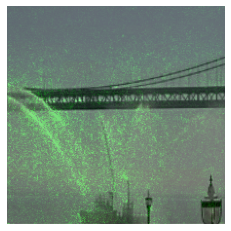

In [5]:
gradients = ig.interpret(
    img_path,
    labels=None,
    baselines='random',
    steps=50,
    num_random_trials=10,
    visual=True,
    save_path=None)

Another choice for visualization is in grayscale:

Note that `IntGradCVInterpreter` also supports multiple images as inputs. They can be either processed images or a list of image filepaths. Feel free to play around with it!